In [97]:
import numpy as np

In [5]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [6]:
X.shape, y.shape

((20, 2), (20,))

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.predict([[-0.2773882 , -0.35475898]])
lr.coef_
# lr.score(X, y)


array([-0.82025122])

In [14]:
from scipy.optimize import minimize
minimize(np.square, 1).x

array([-7.45036449e-09])

# Minimizing a loss function

In this exercise you'll implement linear regression "from scratch" using scipy.optimize.minimize.

We'll train a model on the Boston housing price data set, which is already loaded into the variables X and y. For simplicity, we won't include an intercept in our regression model.

**Instructions**

- Fill in the loss function for least squares linear regression.
- Print out the coefficients from fitting sklearn's LinearRegression.


In [33]:
import pandas as pd
from sklearn.preprocessing import normalize

In [39]:
df = pd.read_csv('../boston.csv')
df.head()
##
y = df['MEDV'].values
X = normalize(df.drop(['MEDV'], axis=1).values)

In [42]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)
print('\n',"We calculated minimization manually using [The squared Loss]", '\n')
# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-8.38350620e+01  1.71456757e+01  3.12100902e+01  1.26774114e+03
 -6.07884417e+03  2.85793930e+03 -8.52468952e-01 -5.42091266e+02
  1.60921496e+02  7.51597668e+00 -3.72380683e+02  1.36115528e+01
 -2.37441469e+02]

 We calculated minimization manually using [The squared Loss] 

[-8.38496885e+01  1.71510561e+01  3.12276664e+01  1.26817615e+03
 -6.08918161e+03  2.85818803e+03 -8.42698630e-01 -5.42330299e+02
  1.60859832e+02  7.52167855e+00 -3.72312240e+02  1.36136393e+01
 -2.37405725e+02]


# Comparing the logistic and hinge losses

In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

The loss function diagram from the video is shown on the right.

**Instructions**

    Evaluate the log_loss() and hinge_loss() functions at the grid points so that they are plotted.
 

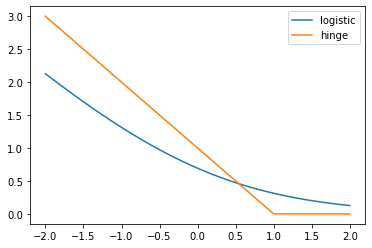

In [43]:
import matplotlib.pyplot as plt

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

# Implementing logistic regression

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!).

The log_loss() function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.

**Instructions**

    Input the number of training examples into range().
    Fill in the loss function for logistic regression.
    Compare the coefficients to sklearn's LogisticRegression.
 

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer


breast_cancer = load_breast_cancer()
scaler = StandardScaler()
# breast_cancer

In [89]:
breast_cancer.data.shape

(569, 30)

In [90]:
X = breast_cancer.data[:,:10]
y = breast_cancer.target
X.shape, y.shape

((569, 10), (569,))

In [94]:
y = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1,  1])

> (first 10 features, standardized)

In [91]:
X = scaler.fit_transform(X)
X

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [95]:
from sklearn.linear_model import LogisticRegression

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

print('\n','Compare the output from manual minimization method and LogR fit()','\n')

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.0358662  -1.6537843   4.08338472 -9.4092387  -1.06786269  0.0789165
 -0.85110192 -2.44103743 -0.45285658  0.43353577]

 Compare the output from manual minimization method and LogR fit() 

[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]
